<a href="https://colab.research.google.com/github/usshaa/Deep-Learning-For-all/blob/main/Module_2_Fundamentals_of_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 Module 2: Fundamentals of Neural Networks**  
### 🎯 **Learning Objectives**  
- Understand the **Perceptron Model**  
- Learn different **Activation Functions**  
- Explore **Feedforward Neural Networks (FNN)**  
- Understand **Loss Functions** and their importance  
- Learn how **Backpropagation & Gradient Descent** work  
- Understand different **Optimizers** (SGD, Adam, RMSProp)  

---

## **🔹 1. Perceptron Model**  

### 🔹 **What is a Perceptron?**  
A **Perceptron** is the simplest type of Artificial Neural Network (ANN) and acts as a binary classifier. It consists of:  
- **Inputs (x1, x2, …, xn)**  
- **Weights (w1, w2, …, wn)**  
- **Summation function (Σ)**  
- **Activation function (f)**  
- **Output (y)**  

### ✅ **Mathematical Representation:**  
\[
y = f\left(\sum w_i x_i + b\right)
\]  

### ✅ **Example: Perceptron Code in Colab**


In [155]:
import numpy as np

# Perceptron Activation Function (Step Function)
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron Model
class Perceptron:
    def __init__(self, input_size, lr=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.lr = lr  # Learning Rate

    def predict(self, x):
        linear_output = np.dot(self.weights, x) + self.bias
        return step_function(linear_output)

    def train(self, X, y, epochs=10):
        for _ in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.lr * error * X[i]  # Update weights
                self.bias += self.lr * error  # Update bias

# Training Data (AND Gate)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND Logic

# Train Perceptron
p = Perceptron(input_size=2)
p.train(X, y)

# Test Model
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {p.predict(X[i])}")

Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1


✅ **Explanation:** The Perceptron learns to perform the **AND function** by adjusting its weights.  

---

## **🔹 2. Activation Functions**
Activation functions introduce **non-linearity** in neural networks.

| Function | Formula | Use Case |
|----------|---------|----------|
| **Sigmoid** | \( f(x) = \frac{1}{1 + e^{-x}} \) | Probabilities (0 to 1) |
| **ReLU** | \( f(x) = \max(0, x) \) | Most common in Deep Learning |
| **Tanh** | \( f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \) | Scales between (-1,1) |
| **Softmax** | \( f(x_i) = \frac{e^{x_i}}{\sum e^{x_j}} \) | Multiclass classification |

### ✅ **Code: Visualizing Activation Functions**


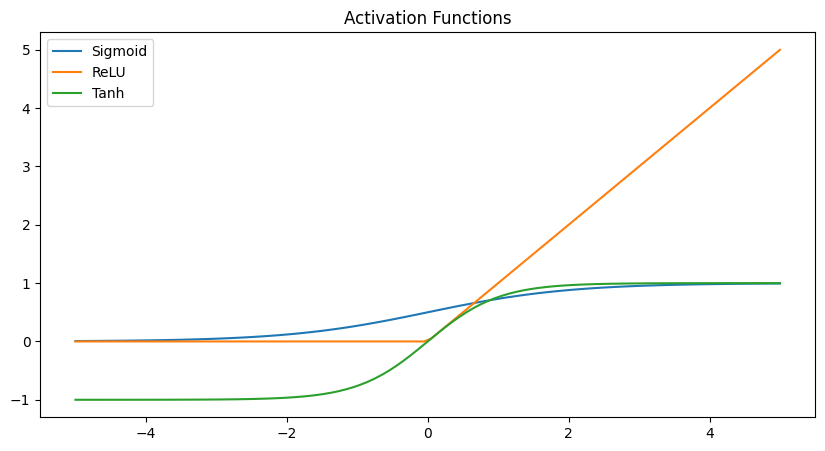

In [156]:
import numpy as np
import matplotlib.pyplot as plt

# Define Activation Functions
def sigmoid(x): return 1 / (1 + np.exp(-x))
def relu(x): return np.maximum(0, x)
def tanh(x): return np.tanh(x)
def softmax(x): return np.exp(x) / np.sum(np.exp(x))

# Plot Functions
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(10, 5))
plt.plot(x, sigmoid(x), label="Sigmoid")
plt.plot(x, relu(x), label="ReLU")
plt.plot(x, tanh(x), label="Tanh")
plt.legend()
plt.title("Activation Functions")
plt.show()

## **🔹 3. Feedforward Neural Networks (FNN)**
An **FNN** consists of **input, hidden, and output layers** where data moves **only forward**.

### ✅ **Example: Simple FNN in Keras**


In [157]:
import tensorflow as tf
from tensorflow import keras

# Create a simple FNN model
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(5,)), # Hidden Layer
    keras.layers.Dense(1, activation='sigmoid')  # Output Layer
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())  # Model architecture

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

None


✅ **Explanation:** This is a simple **Feedforward Neural Network (FNN)** with **one hidden layer**.

---

## **🔹 4. Loss Functions**
Loss functions measure how well the model performs.

| Loss Function | Formula | Use Case |
|--------------|---------|----------|
| **MSE (Mean Squared Error)** | \( \frac{1}{n} \sum (y - \hat{y})^2 \) | Regression |
| **Cross-Entropy** | \( -\sum y \log(\hat{y}) \) | Classification |

✅ **Example: Using MSE in TensorFlow**


In [158]:
y_true = np.array([1, 0, 1])
y_pred = np.array([0.8, 0.1, 0.9])
mse = keras.losses.MeanSquaredError()
print("MSE Loss:", mse(y_true, y_pred).numpy())

MSE Loss: 0.020000001


## **🔹 5. Backpropagation & Gradient Descent**
**Backpropagation** updates model weights by calculating **gradients** using **Gradient Descent**.

### ✅ **Gradient Descent Update Formula**
\[
w = w - \alpha \cdot \frac{dL}{dw}
\]
where:  
- \( w \) = weight  
- \( \alpha \) = learning rate  
- \( \frac{dL}{dw} \) = gradient of loss function  

✅ **Example: Simple Gradient Descent Update**


In [159]:
# Example: Updating weights using gradient descent
w = 0.5  # Initial weight
lr = 0.1  # Learning rate
dw = 0.2  # Gradient of loss w.r.t w

# Update weight
w = w - lr * dw
print("Updated Weight:", w)

Updated Weight: 0.48


## **🔹 6. Optimizers (SGD, Adam, RMSProp)**
Optimizers improve training by adjusting weights efficiently.

| Optimizer | How It Works | Use Case |
|-----------|-------------|----------|
| **SGD** | Updates weights using a small batch of data | Basic optimization |
| **Adam** | Uses momentum & adaptive learning rates | Most popular optimizer |
| **RMSProp** | Divides learning rate by moving average of past gradients | Good for recurrent networks |

✅ **Example: Using Adam Optimizer**


In [161]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **📊 Summary**
| Topic | Key Takeaways |
|-------|--------------|
| **Perceptron** | Simplest neural network, used for binary classification |
| **Activation Functions** | Add non-linearity (Sigmoid, ReLU, Tanh, Softmax) |
| **FNN** | Basic neural network with forward propagation |
| **Loss Functions** | MSE (Regression), Cross-Entropy (Classification) |
| **Backpropagation** | Computes gradients for weight updates |
| **Optimizers** | Adam (Most used), SGD (Basic), RMSProp (For RNNs) |

---